Mounted at /gdrive


In [5]:
!pip install tensorflow

### Import libraries

In [31]:

import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight


tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

################################################################################### # Random seed for reproducibility

seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

###################################################################################  Suppress warnings

import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
###################################################################################  Suppress warnings



2.11.0


In [ ]:
# # # Load the dataset to be used for classification
# !unzip dataset4.zip

In [50]:
# Dataset folders 
dataset_dir = 'dataset4'
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')


labels = ["class1",   #0
          "class2",   #1
          "class3",   #2
         ]

StopIteration: 

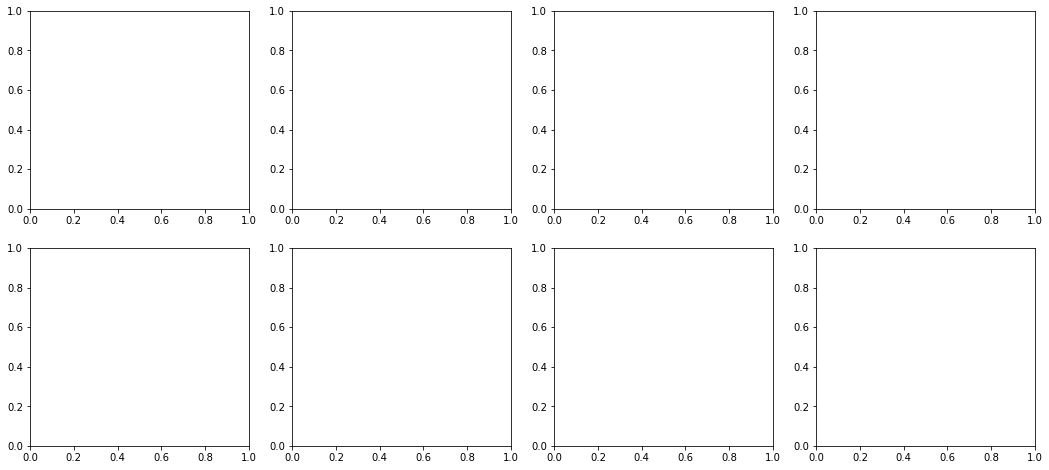

In [47]:
num_row = 2
num_col = 4
fig, axes = plt.subplots(num_row, num_col, figsize=(9*num_row,2*num_col))
for i in range(num_row*num_col):
  if i < 3:
    class_imgs = next(os.walk('{}/train/{}/'.format(dataset_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/train/{}/{}'.format(dataset_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [52]:
# Images are divided into folders, one for each class. 
# If the images are organized in such a way, we can exploit the 
# ImageDataGenerator to read them from disk.
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input



# Create an instance of ImageDataGenerator for training, validation, and test sets
train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
train_gen = train_data_gen.flow_from_directory(directory=training_dir,
                                               target_size=(200,200),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=True,
                                               seed=seed)
valid_gen = train_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=(200,200),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=False,
                                               seed=seed)
test_gen = train_data_gen.flow_from_directory(directory=test_dir,
                                              target_size=(200,200),
                                              color_mode='rgb',
                                              classes=None, # can be set to labels
                                              class_mode='categorical',
                                              batch_size=8,
                                              shuffle=False,
                                              seed=seed)

###################################################################################




Found 11603 images belonging to 3 classes.
Found 1547 images belonging to 3 classes.
Found 2319 images belonging to 3 classes.


## Models metadata

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


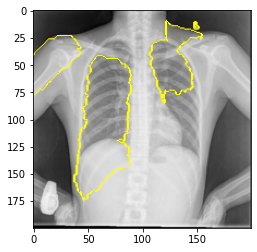

In [670]:
explainer = lime_image.LimeImageExplainer(random_state=100)
explanation = explainer.explain_instance(
        test_images, 
         check_model.predict
)
plt.imshow(test_images)
image, mask = explanation.get_image_and_mask(
         check_model.predict(
              test_images.reshape((1,200,200,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 400 but corresponding boolean dimension is 200

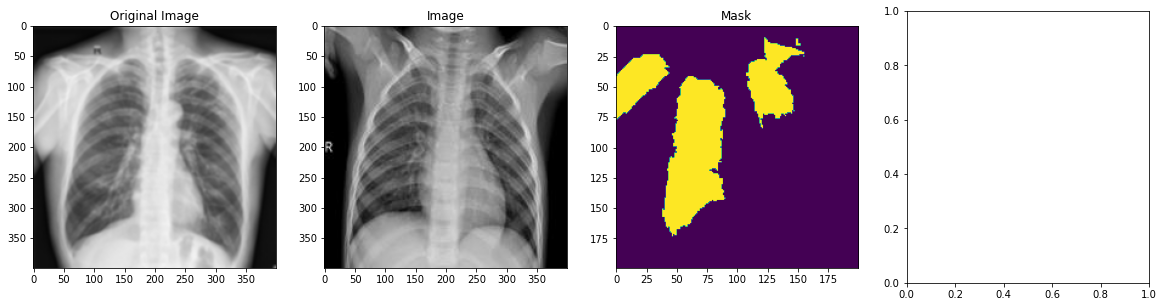

In [740]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

def plot_comparison(main_image, img, mask):
    
    fig = plt.figure(figsize=(20,5))
    
    ax = fig.add_subplot(141)
    ax.imshow(main_image, cmap="gray");
    ax.set_title("Original Image")
    ax = fig.add_subplot(142)
    ax.imshow(img);
    ax.set_title("Image")
    ax = fig.add_subplot(143)
    ax.imshow(mask);
    ax.set_title("Mask")
    ax = fig.add_subplot(144)
    ax.imshow(mark_boundaries(img, mask, color=(0,1,0)));
    ax.set_title("Image+Mask Combined");

plot_comparison(test_imagesraw, image, mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


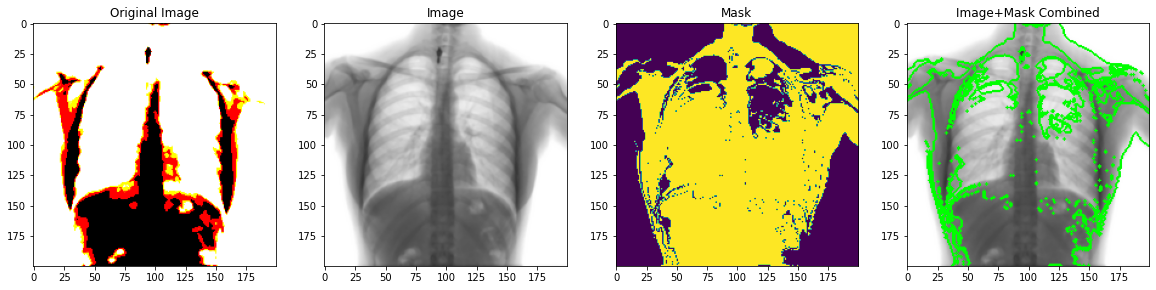

In [13]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

def plot_comparison(main_image, img, mask):
    
    fig = plt.figure(figsize=(20,5))
    
    ax = fig.add_subplot(141)
    ax.imshow(main_image, cmap="gray");
    ax.set_title("Original Image")
    ax = fig.add_subplot(142)
    ax.imshow(img);
    ax.set_title("Image")
    ax = fig.add_subplot(143)
    ax.imshow(mask);
    ax.set_title("Mask")
    ax = fig.add_subplot(144)
    ax.imshow(mark_boundaries(img, mask, color=(0,1,0)));
    ax.set_title("Image+Mask Combined");

plot_comparison(test_images, image, mask_2)

In [62]:
check_modelvgg16 = tfk.models.load_model("NEWmodelvgg16FinetunedSixLayer224")
check_modelvgg19 = tfk.models.load_model("NEWmodelvgg19FinetunedAllLayer224")

OSError: No file or directory found at NEWmodelvgg16FinetunedAllLayer224

In [24]:
image = tfki.load_img("class3.png", target_size=(200, 200))
# Convert the list of images to a numpy array
test_images = np.array(image)
test_images = preprocess_input(test_images)
test_images =test_images.astype("double")

from lime import lime_image
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(test_images, check_modelvgg16.predict,  
                                         top_labels=3, hide_color=0, num_samples=3000)

  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 6s 6s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 199.5, 199.5, -0.5)

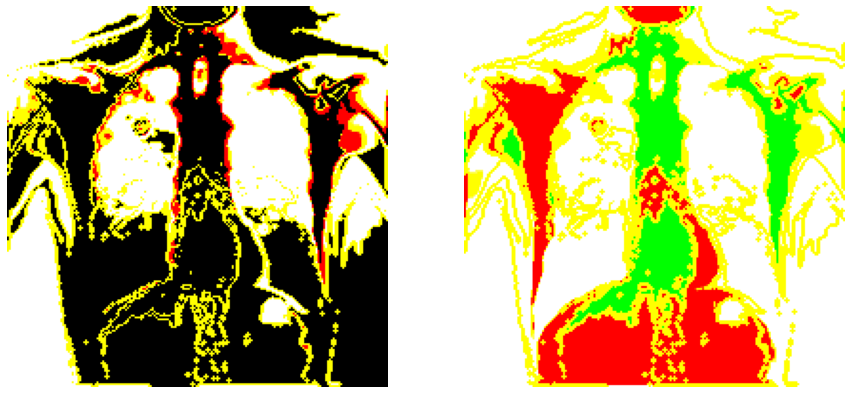

In [30]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=1000, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10000, hide_rest=False)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')



In [28]:
image = tfki.load_img("class3.png", target_size=(200, 200))
# Convert the list of images to a numpy array
test_images = np.array(image)
test_images = preprocess_input(test_images)
test_images =test_images.astype("double")

from lime import lime_image
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(test_images, check_modelvgg19.predict,  
                                         top_labels=3, hide_color=0, num_samples=3000)

  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 9s 9s/step


1/1 [==============================] - 9s 9s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 199.5, 199.5, -0.5)

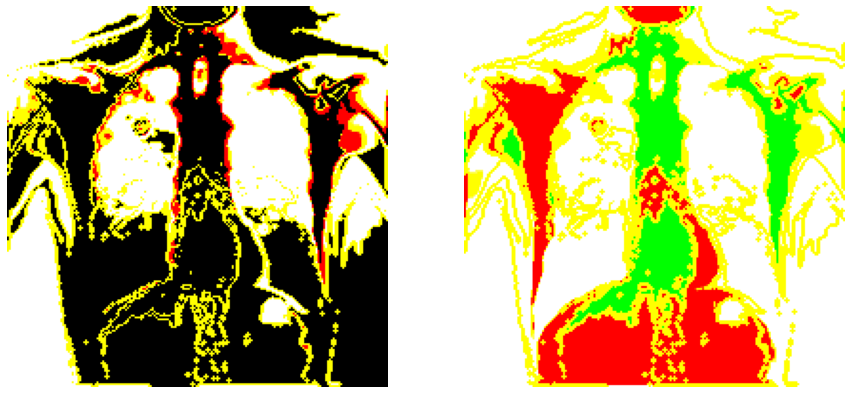

In [29]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=1000, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10000, hide_rest=False)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 399.5, 399.5, -0.5)

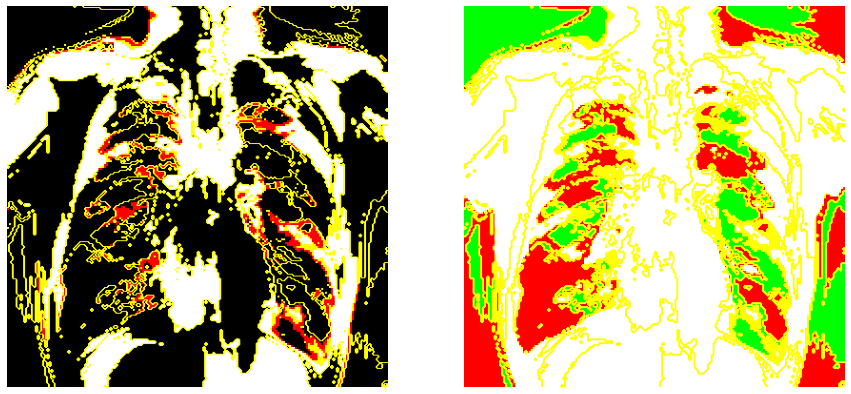